In [0]:
import sklearn.datasets as d
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [0]:
dataset = d.fetch_california_housing()

In [0]:
X,y = dataset.data,dataset.target
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [120]:
rf = RandomForestRegressor(n_estimators=200,max_depth=3,n_jobs=-1)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
predictions = []
for i in rf.estimators_:
  predictions.append(i.predict(x_test))

In [122]:
len(predictions)

200

In [0]:
cum_mean = np.cumsum(predictions,axis=1)/np.arange(1,len(predictions)+1)[:,None]


In [0]:
errors = []
for i in cum_mean:
  errors.append(mean_squared_error(i,y_test))

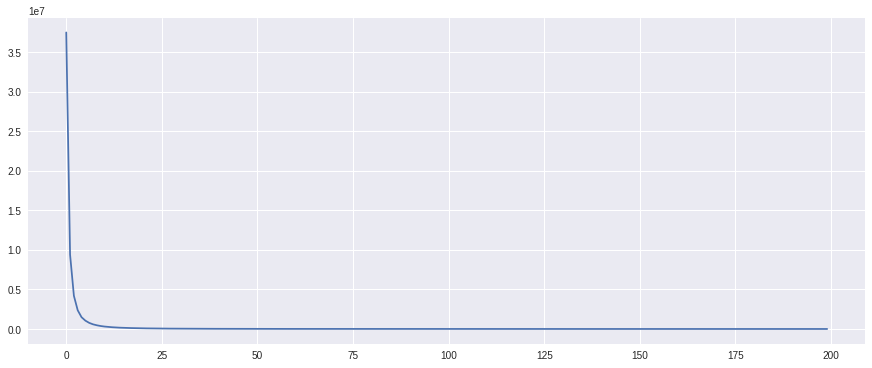

In [125]:
plt.figure(figsize=(15,6))
plt.plot(errors)
